# Decision Tree 

In [78]:
import pandas
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,make_scorer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

### Data import 

In [79]:
df = pandas.read_csv("project3_dataset1.txt",sep='\t',header=None)
features=np.arange(30)
target =[30]

X=df[features]
y=df[target]

mms = MinMaxScaler()
X = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Classifier

In [80]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

### Results 

In [81]:
print("The Metrics are : \n",classification_report(y_test, pred))
print()
print("The Accuracy of the decision tree is : ",accuracy_score(y_test,pred))

The Metrics are : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       108
           1       0.84      0.94      0.89        63

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171


The Accuracy of the decision tree is :  0.9122807017543859


### Plotting the decision Tree

[Text(0.655, 0.9375, '7 <= 0.256\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.47, 0.8125, '20 <= 0.317\ngini = 0.106\nsamples = 249\nvalue = [235, 14]'),
 Text(0.34, 0.6875, '13 <= 0.136\ngini = 0.05\nsamples = 235\nvalue = [229, 6]'),
 Text(0.3, 0.5625, '7 <= 0.223\ngini = 0.042\nsamples = 234\nvalue = [229, 5]'),
 Text(0.16, 0.4375, '14 <= 0.054\ngini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(0.08, 0.3125, '21 <= 0.419\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.04, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.12, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.24, 0.3125, '21 <= 0.562\ngini = 0.009\nsamples = 219\nvalue = [218, 1]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 201\nvalue = [201, 0]'),
 Text(0.28, 0.1875, '21 <= 0.574\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.24, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.32, 0.0625, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.44, 0.4375

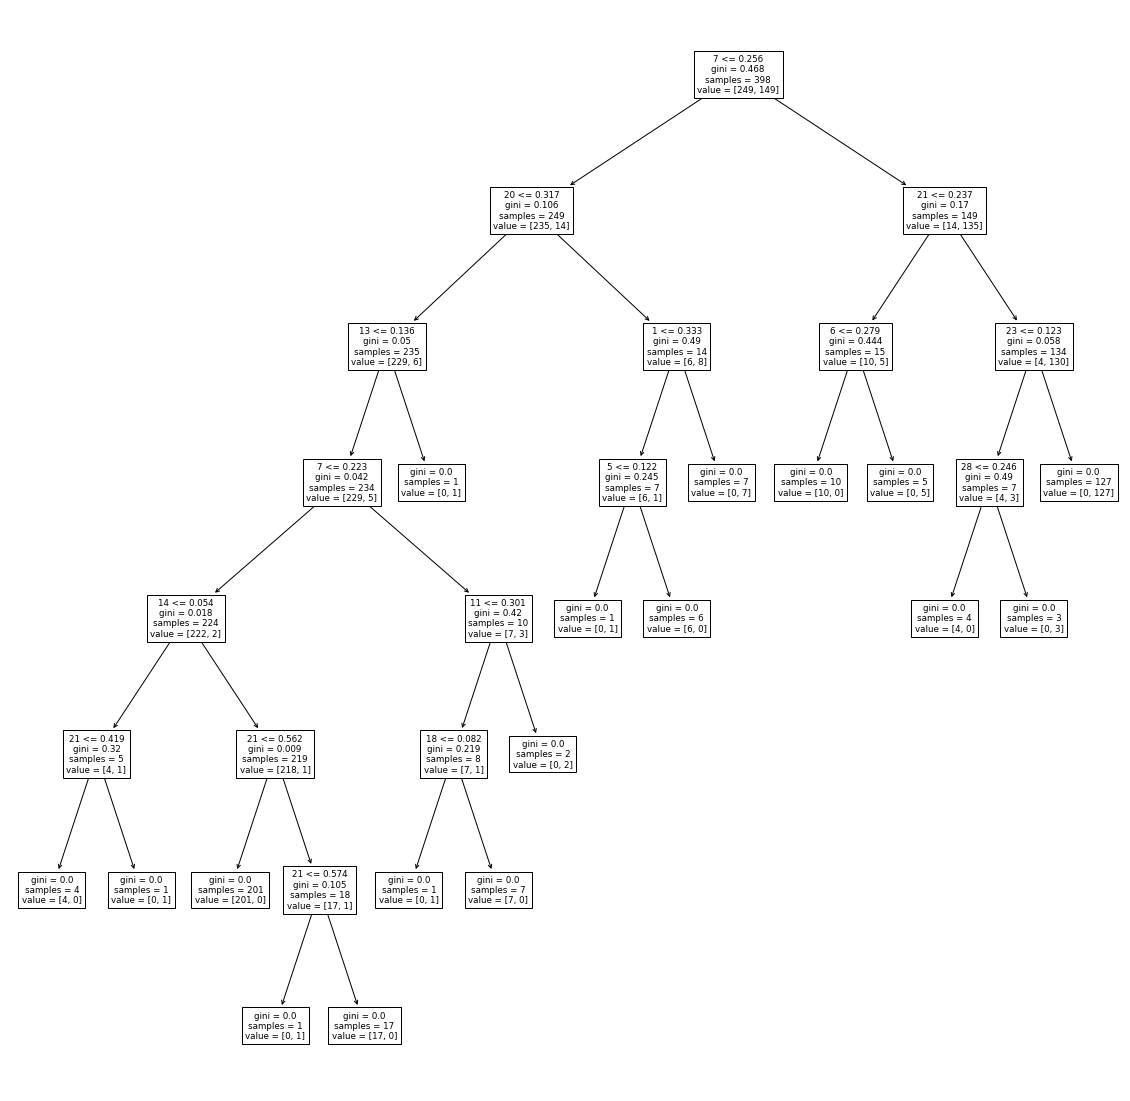

In [7]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_clf, feature_names=features)

### HyperParameter Tuning 

In [57]:
parameters = {
'criterion' : ['gini','entropy'],
'max_depth': [2, 3, 5],
'min_samples_split': [2, 3, 5],
'min_samples_leaf': [1,5,8],
}

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
    
grid_search_dt = GridSearchCV(return_train_score=True,estimator = tree_clf,param_grid = parameters,scoring = scoring, cv = 10,verbose = 3,refit ="Accuracy")
grid_search_dt.fit(X_train, np.ravel(y_train))
print("\n The best params are : \n",grid_search_dt.best_params_)

grid_predictions = grid_search_dt.predict(X_test)
print("\n The results are : \n",classification_report(y_test, grid_predictions))
score = roc_auc_score(y_test, grid_predictions)
print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.964, test=1.000) Accuracy: (train=0.944, test=0.975) F1: (train=0.925, test=0.968) Precision: (train=0.932, test=0.938) Recall: (train=0.918, test=1.000) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.968, test=0.965) Accuracy: (train=0.955, test=0.875) F1: (train=0.940, test=0.828) Precision: (train=0.947, test=0.857) Recall: (train=0.933, test=0.800) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.968, test=0.981) Accuracy: (train=0.944, test=0.950) F1: (train=0.927, test=0.938) Precision: (train=0.907, test=0.882) Recall: (train=0.948, test=1.000) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.973, test=0.748) Accuracy:

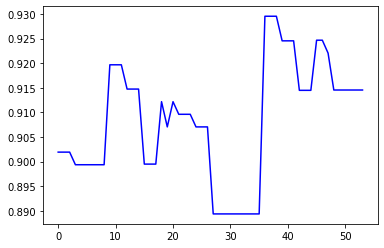

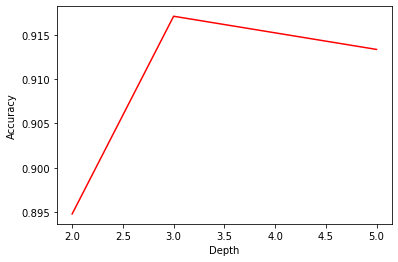

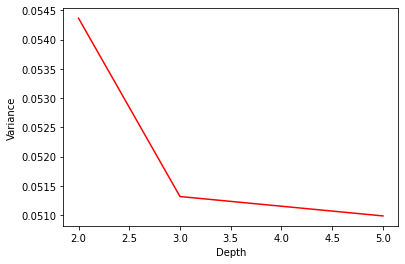

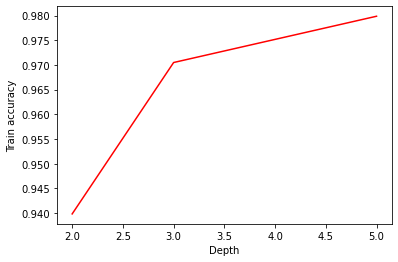

In [58]:
df = pandas.DataFrame(grid_search_dt.cv_results_)

fig = plt.figure()
ax = plt.axes()
x = df.index
y=df['mean_test_Accuracy']
ax.plot(x,y,color='blue')

df1=df.groupby(['param_max_depth']).mean()
a=df1.index
y=df1['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.plot(a,y,color='red')
a=df1.index
y=(df1['std_test_Accuracy'])
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Variance")
ax.plot(a,y,color='red')

y=df1['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Train accuracy")
ax.plot(a,y,color='red')

### 10-Fold Cross Validation

In [59]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score

#df = pd.read_csv("project3_dataset1.txt",sep='\t',header=None)

#X = df.select_dtypes(include=['float64'])
#y = df.iloc[: , -1]

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

tree_clf = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
ct=0  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    tree_clf.fit(x_train_fold, y_train_fold)
    y_pred=tree_clf.predict(x_test_fold)
    lst_accu_stratified.append(tree_clf.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.912, precision = 0.840, recall = 0.955, f1 = 0.894, AUC = 0.920
Fold: 1. Accuracy = 0.912, precision = 0.947, recall = 0.818, f1 = 0.878, AUC = 0.895
Fold: 2. Accuracy = 0.912, precision = 0.864, recall = 0.905, f1 = 0.884, AUC = 0.911
Fold: 3. Accuracy = 0.982, precision = 0.955, recall = 1.000, f1 = 0.977, AUC = 0.986
Fold: 4. Accuracy = 0.912, precision = 0.808, recall = 1.000, f1 = 0.894, AUC = 0.931
Fold: 5. Accuracy = 0.912, precision = 0.864, recall = 0.905, f1 = 0.884, AUC = 0.911
Fold: 6. Accuracy = 0.912, precision = 0.833, recall = 0.952, f1 = 0.889, AUC = 0.921
Fold: 7. Accuracy = 0.965, precision = 1.000, recall = 0.905, f1 = 0.950, AUC = 0.952
Fold: 8. Accuracy = 0.877, precision = 0.938, recall = 0.714, f1 = 0.811, AUC = 0.843
Fold: 9. Accuracy = 0.893, precision = 0.941, recall = 0.762, f1 = 0.842, AUC = 0.867
List of possible accuracy: [0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9824561403508771, 0.9122807017543859, 0.9122807017

# RANDOM FOREST

### Random Forest Classifier 

In [86]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, np.ravel(y_train));
y_pred = rf.predict(X_test)

### Results

In [87]:
print("The Metrics are : \n",classification_report(y_test, y_pred))
print()
print("The Accuracy of the Random Forest is : ",accuracy_score(y_test,y_pred))

The Metrics are : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


The Accuracy of the Random Forest is :  0.9532163742690059


### Hyperparameter of Random Forest

In [88]:
param_grid = {
'max_depth': [10, 20, 30],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [10, 100, 300,500]
}



rf = RandomForestClassifier(random_state = 1)
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
grid_search = GridSearchCV(return_train_score=True,estimator=rf, param_grid=param_grid, cv=10, verbose=3, scoring = scoring,refit="Accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)


print(grid_search.score(X_test, y_test))
print(classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; AUC: (train=1.000, test=1.000) Accuracy: (train=0.997, test=1.000) F1: (train=0.996, test=1.000) Precision: (train=1.000, test=1.000) Recall: (train=0.993, test=1.000) total time=   0.0s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; AUC: (train=1.000, test=0.997) Accuracy: (train=1.000, test=0.950) F1: (train=1.000, test=0.933) Precision: (train=1.000, test=0.933) Recall: (train=1.000, test=0.933) total time=   0.0s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; AUC: (train=1.000, test=0.983) Accuracy: (train=0.997, test=0.900) F1: (train=0.996, test=0.867) Precision: (train=1.000, test=0.867) Recall: (train=0.993, test=0.867) total time=   0.0s
[CV 4/10] END max_depth=10, max_features=auto, min_samples_

In [89]:
print("The best Params for the dataset 2 are : \n",grid_search.best_params_)

The best Params for the dataset 2 are : 
 {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


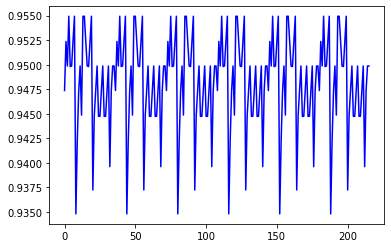

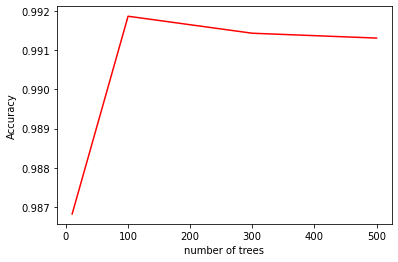

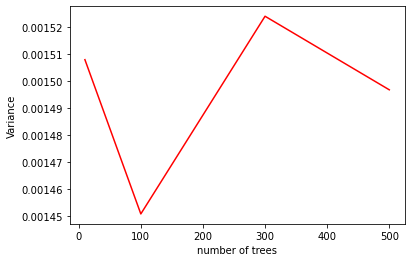

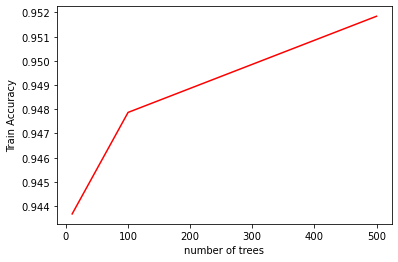

In [93]:
df = pandas.DataFrame(grid_search.cv_results_)
x = df.index
y=df['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y,color='blue')

df1=df.sort_values(['param_n_estimators'])
df1=df1.groupby(['param_n_estimators']).mean()
a=df1.index
y=df1['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
ax.plot(a,y,color='red')

y=(df1['std_test_Accuracy']) * (df1['std_test_Accuracy'])
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Variance")
ax.plot(a,y,color='red')

m=df1['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Train Accuracy")
ax.plot(a,m,color='red')


### 10 FOLD CROSS VALIDATION

In [97]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)

rf_clf = RandomForestClassifier(n_estimators=100)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
ct=0  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf_clf.fit(x_train_fold, np.ravel(y_train_fold))
    y_pred=rf_clf.predict(x_test_fold)
    lst_accu_stratified.append(rf_clf.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.965, precision = 1.000, recall = 0.909, f1 = 0.952, AUC = 0.955
Fold: 1. Accuracy = 0.947, precision = 1.000, recall = 0.864, f1 = 0.927, AUC = 0.932
Fold: 2. Accuracy = 0.930, precision = 0.947, recall = 0.857, f1 = 0.900, AUC = 0.915
Fold: 3. Accuracy = 0.965, precision = 0.913, recall = 1.000, f1 = 0.955, AUC = 0.972
Fold: 4. Accuracy = 0.982, precision = 1.000, recall = 0.952, f1 = 0.976, AUC = 0.976
Fold: 5. Accuracy = 0.982, precision = 1.000, recall = 0.952, f1 = 0.976, AUC = 0.976
Fold: 6. Accuracy = 0.965, precision = 0.913, recall = 1.000, f1 = 0.955, AUC = 0.972
Fold: 7. Accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000, AUC = 1.000
Fold: 8. Accuracy = 0.965, precision = 0.952, recall = 0.952, f1 = 0.952, AUC = 0.962
Fold: 9. Accuracy = 0.964, precision = 0.952, recall = 0.952, f1 = 0.952, AUC = 0.962
List of possible accuracy: [0.9649122807017544, 0.9473684210526315, 0.9298245614035088, 0.9649122807017544, 0.9824561403508771, 0.9824561403

# Data set 2

In [59]:
datafile2 = pandas.read_csv("project3_dataset2.txt",sep='\t',header=None)


### Splitting the data 

In [60]:
datafile2.loc[datafile2[4]=='Absent', 4] = 0
datafile2.loc[datafile2[4]=='Present', 4] = 1

X_df2=datafile2.iloc[:, 0:8]
y_df2=datafile2.iloc[:,-1]

mms = MinMaxScaler()
X_df2 = mms.fit_transform(X_df2)

X_train, X_test, y_train, y_test = train_test_split(X_df2, y_df2, test_size=0.3, random_state=42)

### Decision tree classifier 

In [61]:
tree_clf_dataset2 = DecisionTreeClassifier(random_state=42)
tree_clf_dataset2.fit(X_train, y_train)
pred = tree_clf_dataset2.predict(X_test)

### Results

In [62]:
print("The Metrics are : \n",classification_report(y_test, pred))
print()
print("The Accuracy of the decision tree for dataset 2 is : ",accuracy_score(y_test,pred))

The Metrics are : 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        93
           1       0.43      0.50      0.46        46

    accuracy                           0.61       139
   macro avg       0.58      0.58      0.58       139
weighted avg       0.63      0.61      0.62       139


The Accuracy of the decision tree for dataset 2 is :  0.6115107913669064


### Plotting the graph 

[Text(0.6724713740458015, 0.9615384615384616, '1 <= 0.258\ngini = 0.457\nsamples = 323\nvalue = [209, 114]'),
 Text(0.4518129770992366, 0.8846153846153846, '4 <= 0.5\ngini = 0.416\nsamples = 281\nvalue = [198, 83]'),
 Text(0.23568702290076335, 0.8076923076923077, '1 <= 0.015\ngini = 0.301\nsamples = 168\nvalue = [137, 31]'),
 Text(0.12213740458015267, 0.7307692307692307, '0 <= 0.333\ngini = 0.155\nsamples = 71\nvalue = [65, 6]'),
 Text(0.061068702290076333, 0.6538461538461539, '6 <= 0.129\ngini = 0.07\nsamples = 55\nvalue = [53, 2]'),
 Text(0.030534351145038167, 0.5769230769230769, '6 <= 0.109\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.015267175572519083, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.04580152671755725, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0916030534351145, 0.5769230769230769, '5 <= 0.823\ngini = 0.037\nsamples = 53\nvalue = [52, 1]'),
 Text(0.07633587786259542, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.1068702290

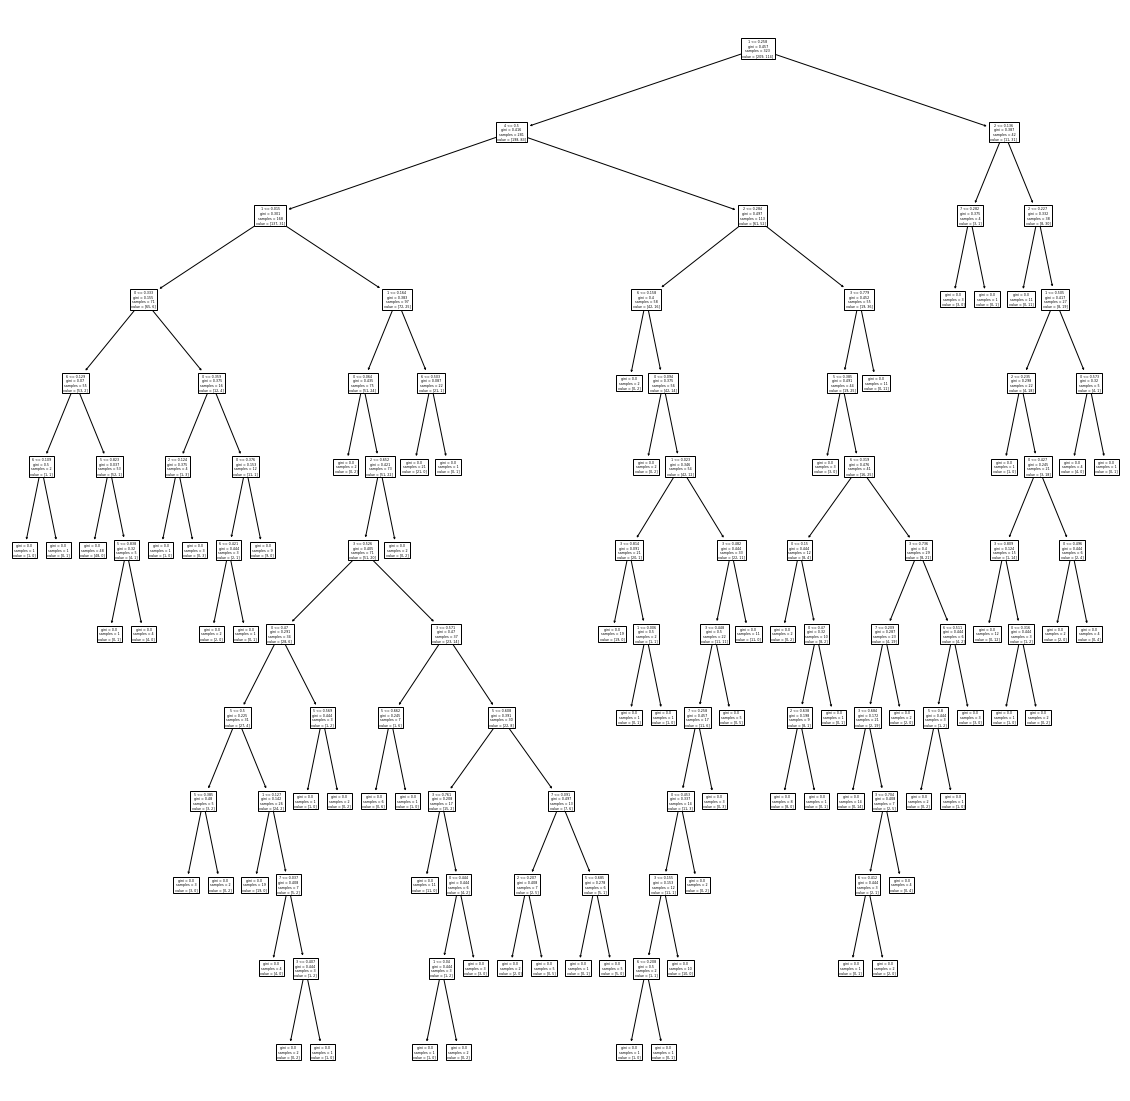

In [63]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_clf_dataset2, feature_names=features)

### Hyperparameter Tuning 

In [65]:
parameters = {
'criterion' : ['gini', 'entropy'],
'max_depth': [2, 3, 5],
'min_samples_split': [2, 3, 5],
'min_samples_leaf': [1,5,8],
}

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
    
grid_search_dt = GridSearchCV(return_train_score=True,estimator = tree_clf,param_grid = parameters,scoring = scoring, cv = 10,verbose = 3,refit ="Accuracy")
grid_search_dt.fit(X_train, np.ravel(y_train))
print("The best Params for dataset 2 are : \n",grid_search_dt.best_params_)
grid_predictions = grid_search_dt.predict(X_test)
print("The metrics for dataset 2 are : \n ",classification_report(y_test, grid_predictions))
score = roc_auc_score(y_test, grid_predictions)
print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.719, test=0.677) Accuracy: (train=0.703, test=0.758) F1: (train=0.377, test=0.556) Precision: (train=0.722, test=0.833) Recall: (train=0.255, test=0.417) total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.709, test=0.726) Accuracy: (train=0.703, test=0.758) F1: (train=0.386, test=0.500) Precision: (train=0.711, test=1.000) Recall: (train=0.265, test=0.333) total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.717, test=0.675) Accuracy: (train=0.710, test=0.727) F1: (train=0.408, test=0.471) Precision: (train=0.725, test=0.800) Recall: (train=0.284, test=0.333) total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2; AUC: (train=0.748, test=0.529) Accuracy:

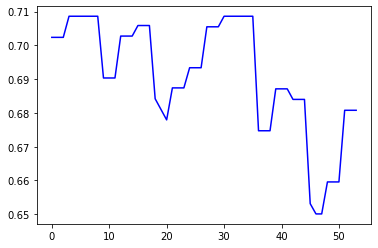

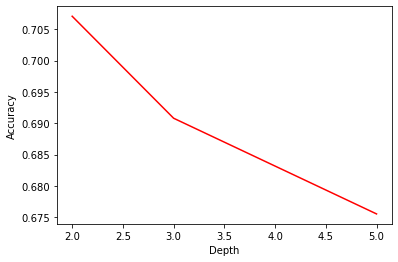

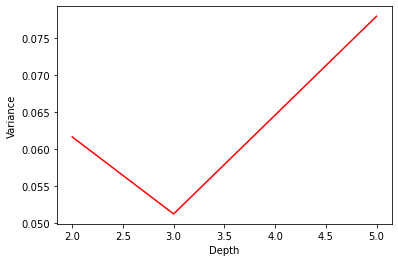

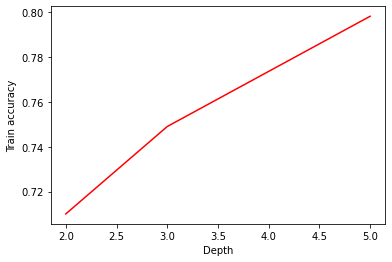

In [66]:
df = pandas.DataFrame(grid_search_dt.cv_results_)

fig = plt.figure()
ax = plt.axes()
x = df.index
y=df['mean_test_Accuracy']
ax.plot(x,y,color='blue')

df1=df.groupby(['param_max_depth']).mean()
a=df1.index
y=df1['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.plot(a,y,color='red')
a=df1.index
y=(df1['std_test_Accuracy'])
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Variance")
ax.plot(a,y,color='red')

y=df1['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("Depth")
plt.ylabel("Train accuracy")
ax.plot(a,y,color='red')

### 10-Fold cross validation

In [84]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_df2)

tree_clf = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
ct=0  
for train_index, test_index in skf.split(X_df2, y_df2):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    tree_clf.fit(x_train_fold, y_train_fold)
    y_pred=tree_clf.predict(x_test_fold)
    lst_accu_stratified.append(tree_clf.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.468, precision = 0.200, recall = 0.105, f1 = 0.138, AUC = 0.410
Fold: 1. Accuracy = 0.489, precision = 0.250, recall = 0.167, f1 = 0.200, AUC = 0.428
Fold: 2. Accuracy = 0.543, precision = 0.357, recall = 0.294, f1 = 0.323, AUC = 0.492
Fold: 3. Accuracy = 0.652, precision = 0.467, recall = 0.467, f1 = 0.467, AUC = 0.604
Fold: 4. Accuracy = 0.500, precision = 0.308, recall = 0.222, f1 = 0.258, AUC = 0.450
Fold: 5. Accuracy = 0.500, precision = 0.286, recall = 0.429, f1 = 0.343, AUC = 0.480
Fold: 6. Accuracy = 0.543, precision = 0.214, recall = 0.231, f1 = 0.222, AUC = 0.449
Fold: 7. Accuracy = 0.543, precision = 0.318, recall = 0.538, f1 = 0.400, AUC = 0.542
Fold: 8. Accuracy = 0.543, precision = 0.375, recall = 0.353, f1 = 0.364, AUC = 0.504
Fold: 9. Accuracy = 0.587, precision = 0.438, recall = 0.412, f1 = 0.424, AUC = 0.551
List of possible accuracy: [0.46808510638297873, 0.48936170212765956, 0.5434782608695652, 0.6521739130434783, 0.5, 0.5, 0.5434782608695652, 

# Random Forest

In [34]:
rf_clf_dataset2 = RandomForestClassifier(n_estimators=100)
rf_clf_dataset2.fit(X_train,np.ravel(y_train))

y_pred = rf_clf_dataset2.predict(X_test)

### Results

In [35]:
clf_report = pandas.DataFrame(classification_report(y_test, pred, output_dict=True))
print("The Metrics are : \n",clf_report)
print()
print("The Accuracy of the Random Forest for dataset 2 is : ",accuracy_score(y_test,pred))

The Metrics are : 
                    0          1  accuracy   macro avg  weighted avg
precision   0.729412   0.425926  0.611511    0.577669      0.628978
recall      0.666667   0.500000  0.611511    0.583333      0.611511
f1-score    0.696629   0.460000  0.611511    0.578315      0.618320
support    93.000000  46.000000  0.611511  139.000000    139.000000

The Accuracy of the Random Forest for dataset 2 is :  0.6115107913669064


### Hyperparameter Tuning for dataset2- Random Forest

In [36]:
param_grid = {
'max_depth': [10, 20, 30],
'max_features': ['auto','sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [100, 300, 500]
}

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score),"F1":"f1","Precision":"precision","Recall":"recall"}
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
grid_search = GridSearchCV(return_train_score=True,estimator=rf, param_grid=param_grid, cv=10, verbose=3, scoring = scoring,refit="Accuracy")
grid_search.fit(X_train, np.ravel(y_train))

grid_pred = grid_search.predict(X_test)
score = roc_auc_score(y_test, grid_pred)

print("The best params for dataset 2 are : \n",grid_search.best_params_)
print("The metrics with best params are : \n",classification_report(y_test, grid_pred))

print(f"ROC AUC: {score:.4f}")

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV 1/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; AUC: (train=1.000, test=0.603) Accuracy: (train=1.000, test=0.697) F1: (train=1.000, test=0.583) Precision: (train=1.000, test=0.583) Recall: (train=1.000, test=0.583) total time=   0.3s
[CV 2/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; AUC: (train=1.000, test=0.667) Accuracy: (train=1.000, test=0.636) F1: (train=1.000, test=0.333) Precision: (train=1.000, test=0.500) Recall: (train=1.000, test=0.250) total time=   0.1s
[CV 3/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; AUC: (train=1.000, test=0.893) Accuracy: (train=1.000, test=0.818) F1: (train=1.000, test=0.700) Precision: (train=1.000, test=0.875) Recall: (train=1.000, test=0.583) total time=   0.1s
[CV 4/10] END max_depth=10, max_features=auto, min_sampl

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.991, test=0.675) Accuracy: (train=0.931, test=0.656) F1: (train=0.898, test=0.353) Precision: (train=0.946, test=0.500) Recall: (train=0.854, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.987, test=0.589) Accuracy: (train=0.938, test=0.719) F1: (train=0.906, test=0.526) Precision: (train=0.978, test=0.625) Recall: (train=0.845, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.992, test=0.753) Accuracy: (train=0.938, test=0.719) F1: (train=0.906, test=0.571) Precision: (train=0.978, test=0.600) Recall: (train=0.845, test=0.545) total time=   0.1s
[CV 9/10] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.983, test=0.693) Accuracy: (train=0.911, test=0.688) F1: (train=0.863, test=0.375) Precision: (train=0.943, test=0.600) Recall: (train=0.796, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.983, test=0.589) Accuracy: (train=0.921, test=0.719) F1: (train=0.876, test=0.526) Precision: (train=0.988, test=0.625) Recall: (train=0.786, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.758) Accuracy: (train=0.918, test=0.688) F1: (train=0.874, test=0.500) Precision: (train=0.954, test=0.556) Recall: (train=0.806, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.991, test=0.675) Accuracy: (train=0.931, test=0.656) F1: (train=0.898, test=0.353) Precision: (train=0.946, test=0.500) Recall: (train=0.854, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.987, test=0.589) Accuracy: (train=0.938, test=0.719) F1: (train=0.906, test=0.526) Precision: (train=0.978, test=0.625) Recall: (train=0.845, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train=0.992, test=0.753) Accuracy: (train=0.938, test=0.719) F1: (train=0.906, test=0.571) Precision: (train=0.978, test=0.600) Recall: (train=0.845, test=0.545) total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.983, test=0.693) Accuracy: (train=0.911, test=0.688) F1: (train=0.863, test=0.375) Precision: (train=0.943, test=0.600) Recall: (train=0.796, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.983, test=0.589) Accuracy: (train=0.921, test=0.719) F1: (train=0.876, test=0.526) Precision: (train=0.988, test=0.625) Recall: (train=0.786, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.758) Accuracy: (train=0.918, test=0.688) F1: (train=0.874, test=0.500) Precision: (train=0.954, test=0.556) Recall: (train=0.806, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.986, test=0.684) Accuracy: (train=0.924, test=0.688) F1: (train=0.884, test=0.375) Precision: (train=0.966, test=0.600) Recall: (train=0.816, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.571) Accuracy: (train=0.921, test=0.688) F1: (train=0.877, test=0.500) Precision: (train=0.976, test=0.556) Recall: (train=0.796, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.988, test=0.745) Accuracy: (train=0.921, test=0.688) F1: (train=0.880, test=0.500) Precision: (train=0.955, test=0.556) Recall: (train=0.816, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.986, test=0.684) Accuracy: (train=0.924, test=0.688) F1: (train=0.884, test=0.375) Precision: (train=0.966, test=0.600) Recall: (train=0.816, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.571) Accuracy: (train=0.921, test=0.688) F1: (train=0.877, test=0.500) Precision: (train=0.976, test=0.556) Recall: (train=0.796, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.988, test=0.745) Accuracy: (train=0.921, test=0.688) F1: (train=0.880, test=0.500) Precision: (train=0.955, test=0.556) Recall: (train=0.816, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.986, test=0.684) Accuracy: (train=0.924, test=0.688) F1: (train=0.884, test=0.375) Precision: (train=0.966, test=0.600) Recall: (train=0.816, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.571) Accuracy: (train=0.921, test=0.688) F1: (train=0.877, test=0.500) Precision: (train=0.976, test=0.556) Recall: (train=0.796, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.988, test=0.745) Accuracy: (train=0.921, test=0.688) F1: (train=0.880, test=0.500) Precision: (train=0.955, test=0.556) Recall: (train=0.816, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

/Users/anushruti/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 6/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.986, test=0.684) Accuracy: (train=0.924, test=0.688) F1: (train=0.884, test=0.375) Precision: (train=0.966, test=0.600) Recall: (train=0.816, test=0.273) total time=   0.1s
[CV 7/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.985, test=0.571) Accuracy: (train=0.921, test=0.688) F1: (train=0.877, test=0.500) Precision: (train=0.976, test=0.556) Recall: (train=0.796, test=0.455) total time=   0.1s
[CV 8/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train=0.988, test=0.745) Accuracy: (train=0.921, test=0.688) F1: (train=0.880, test=0.500) Precision: (train=0.955, test=0.556) Recall: (train=0.816, test=0.455) total time=   0.1s
[CV 9/10] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; AUC: (train

### 10 FOLD CROSS VALIDATION

In [93]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_df2)

rf_clf_dataset2 = RandomForestClassifier(n_estimators=100)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
ct=0  
for train_index, test_index in skf.split(X_df2, y_df2):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf_clf_dataset2.fit(x_train_fold, np.ravel(y_train_fold))
    y_pred=rf_clf_dataset2.predict(x_test_fold)
    lst_accu_stratified.append(rf_clf_dataset2.score(x_test_fold, y_test_fold))
    accr = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)
    roc = roc_auc_score(y_test_fold, y_pred, average='weighted')
    print(f"Fold: {ct}. Accuracy = {accr:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, AUC = {roc:.3f}")
    ct+=1

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

Fold: 0. Accuracy = 0.638, precision = 0.750, recall = 0.158, f1 = 0.261, AUC = 0.561
Fold: 1. Accuracy = 0.574, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.466
Fold: 2. Accuracy = 0.543, precision = 0.000, recall = 0.000, f1 = 0.000, AUC = 0.431
Fold: 3. Accuracy = 0.652, precision = 0.429, recall = 0.200, f1 = 0.273, AUC = 0.535
Fold: 4. Accuracy = 0.565, precision = 0.250, recall = 0.056, f1 = 0.091, AUC = 0.474
Fold: 5. Accuracy = 0.609, precision = 0.167, recall = 0.071, f1 = 0.100, AUC = 0.458
Fold: 6. Accuracy = 0.587, precision = 0.125, recall = 0.077, f1 = 0.095, AUC = 0.432
Fold: 7. Accuracy = 0.609, precision = 0.143, recall = 0.077, f1 = 0.100, AUC = 0.448
Fold: 8. Accuracy = 0.609, precision = 0.400, recall = 0.118, f1 = 0.182, AUC = 0.507
Fold: 9. Accuracy = 0.652, precision = 0.556, recall = 0.294, f1 = 0.385, AUC = 0.578
List of possible accuracy: [0.6382978723404256, 0.574468085106383, 0.5434782608695652, 0.6521739130434783, 0.5652173913043478, 0.60869565217

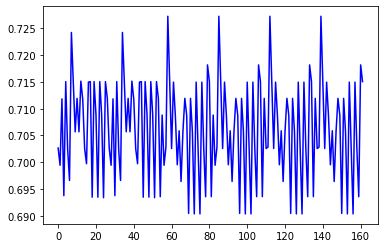

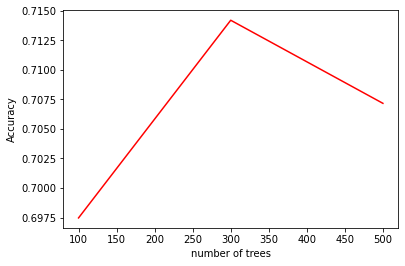

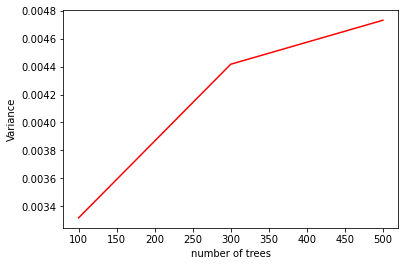

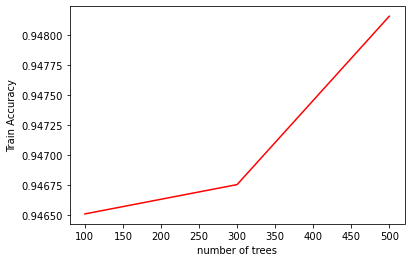

In [43]:
df = pandas.DataFrame(grid_search.cv_results_)
x = df.index
y=df['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y,color='blue')

df1=df.groupby(['param_n_estimators']).mean()
a=df1.index
y=df1['mean_test_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
ax.plot(a,y,color='red')

y=(df1['std_test_Accuracy']) * (df1['std_test_Accuracy'])
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Variance")
ax.plot(a,y,color='red')

m=df1['mean_train_Accuracy']
fig = plt.figure()
ax = plt.axes()
plt.xlabel("number of trees")
plt.ylabel("Train Accuracy")
ax.plot(a,m,color='red')